In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [30]:
AllName="dataG.pkl"
ResizesName="dataM.pkl"
ItersName="dataL.pkl"
matrixIt_Total="data_L_Total.csv"
n_cores=20
repet = 5 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
processes = [2,10,20,40,80,120,160]

positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,1)', '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,1)', '(20,10)',  '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,1)', '(40,10)',  '(40,20)', '(40,80)', '(40,120)','(40,160)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)', '(80,120)','(80,160)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)','(120,160)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

labelsExpand = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,1)', 
            '(20,1)', '(20,10)',
            '(40,1)', '(40,10)',  '(40,20)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

#                       WORST        BEST
labels_dist = ['null', 'SpreadFit', 'CompactFit']
                  #0          #1                #2                        #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                  #4      #5             #6                     #7
    
colors_m = ['green','springgreen','blue','darkblue','red','darkred','darkgoldenrod','olive','violet']
linestyle_m = ['-', '--', '-.', ':']
markers_m = ['.','v','s','p', 'h','d','X','P','^']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [31]:
dfG = pd.read_pickle( AllName )

dfG['ADR'] = round((dfG['ADR'] / dfG['DR']) * 100,1)
dfG['SDR'] = round((dfG['SDR'] / dfG['DR']) * 100,1)
       
out_group = dfG.groupby(['Groups', 'ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_total']
group = dfG.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','Groups'])['T_total']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'T_total'}, inplace=True) 

out_grouped_G = out_group.agg(['median'])
out_grouped_G.rename(columns={'median':'T_total'}, inplace=True) 

In [32]:
dfM = pd.read_pickle( ResizesName )

dfM['ADR'] = round((dfM['ADR'] / dfM['DR']) * 100,1)
dfM['SDR'] = round((dfM['SDR'] / dfM['DR']) * 100,1)
dfM['T_Malleability'] = dfM['T_spawn'] + dfM['T_SR'] + dfM['T_AR']
       
out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']
group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']

grouped_aggM = group.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

out_grouped_M = out_group.agg(['median'])
out_grouped_M.columns = out_grouped_M.columns.get_level_values(0)

/tmp/ipykernel_1608/535752050.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']
/tmp/ipykernel_1608/535752050.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_spawn','T_spawn_real','T_SR','T_AR']


In [33]:
dfL = pd.read_pickle( ItersName )

dfL['ADR'] = round((dfL['ADR'] / dfL['DR']) * 100,1)
dfL['SDR'] = round((dfL['SDR'] / dfL['DR']) * 100,1)
dfL['ADR'].fillna(-1, inplace=True)
dfL['SDR'].fillna(-1, inplace=True)
dfL['DR'].fillna(-1, inplace=True)
       
group = dfL.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_iter']
grouped_aggLAsynch = group.agg(['mean'])
grouped_aggLAsynch.columns = grouped_aggLAsynch.columns.get_level_values(0)
grouped_aggLAsynch.rename(columns={'mean':'T_iter'}, inplace=True) 
group = dfL.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.mean(x,0))
grouped_aggLAsynch['T_stages'] = aux_column
#grouped_aggLAsynch.set_axis(['T_iter', 'Omega'], axis='columns', inplace=True)

group = dfL.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch.rename(columns={'mean':'T_iter'}, inplace=True)
group = dfL.groupby(['NP'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.mean(x,0))
grouped_aggLSynch['T_stages'] = aux_column

aux_df = dfL[(dfL.Asynch_Iters == False)]
group = aux_df[(dfL.Is_Dynamic == True)].groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_iter']
grouped_aggLDyn = group.agg(['mean'])
grouped_aggLDyn.rename(columns={'mean':'T_iter'}, inplace=True)
group = aux_df.groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.mean(x,0))
grouped_aggLDyn['T_stages'] = aux_column

group = aux_df[(dfL.Is_Dynamic == False)].groupby('NP')['T_iter']
grouped_aggLNDyn = group.agg(['mean'])
grouped_aggLNDyn.rename(columns={'mean':'T_iter'}, inplace=True)
group = aux_df.groupby(['NP'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.mean(x,0))
grouped_aggLNDyn['T_stages'] = aux_column

/tmp/ipykernel_1608/3865383421.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group = aux_df[(dfL.Is_Dynamic == True)].groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_iter']
/tmp/ipykernel_1608/3865383421.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group = aux_df[(dfL.Is_Dynamic == False)].groupby('NP')['T_iter']


In [34]:
from bt_scheme import PartialSolution, BacktrackingSolver
def elegirConf(parameters):
    class StatePS(PartialSolution):
        def __init__(self, config):
            self.config= config
            self.n= len(config) #Indica el valor a añadir

        def is_solution(self):
            return self.n == len(parameters)

        def get_solution(self):
            return tuple(self.config)

        def successors(self):
            array = parameters[self.n]
            for parameter_value in array: #Test all values of the next parameter
                self.config.append(parameter_value)
                yield StatePS(self.config)
                self.config.pop()

    initialPs= StatePS([])
    return BacktrackingSolver().solve(initialPs)


def obtenerConfs(parameters):
    soluciones=[]
    for solucion in elegirConf(parameters):
        soluciones.append(solucion)
    return soluciones

def modifyToGlobal(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (parameters[i][0], configuration[i])
        else:
            aux = (configuration[i])
        usable_configuration.append(aux)
        
    return usable_configuration

def modifyToLocalDynamic(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (configuration[i], -1)
        else:
            aux = (-1)
        usable_configuration.append(aux)
        
    return tuple(usable_configuration)

def CheckConfExists(configuration, dataSet, type_conf='global'):
    exists = False
    config = list(configuration)
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                if type_conf == 'global':
                    config.append((np_aux, ns_aux))
                elif type_conf == 'malleability':
                    config.append(np_aux)
                    config.append(ns_aux)
                elif type_conf == 'local':
                    config.append(np_aux)
                    
                if tuple(config) in dataSet.index:     
                    exists = True # FIXME Return here true?
                config.pop()
                
                if type_conf == 'malleability':
                    config.pop()
    return exists

In [35]:
adr = [0,96.6]
sp_method = [0,1]
rd_method = [0,1]
rd_strat  = [1,2]
parameters = [adr, sp_method, rd_method, rd_strat]
len_parameters = [1,2,2,2]
configurations_aux = obtenerConfs(parameters)
configurations = []
configurations_local_dynamic = set()
configurations_local = set()
configurations_simple = []
for checked_conf in configurations_aux:
    aux_conf = modifyToGlobal(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggG):
        configurations.append(aux_conf)

    if CheckConfExists(checked_conf, grouped_aggM, 'malleability'):
        configurations_simple.append(list(checked_conf))
        
    aux_conf = modifyToLocalDynamic(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggLDyn, 'local'):
        configurations_local_dynamic.add(aux_conf)

configurations_local_dynamic = list(configurations_local_dynamic)
for index in range(len(configurations_local_dynamic)):
    configurations_local_dynamic[index] = list(configurations_local_dynamic[index])

print(configurations_simple)
print(configurations_local_dynamic)
print(configurations)
print(len(configurations))

[[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [96.6, 0, 0, 1], [96.6, 0, 0, 2], [96.6, 0, 1, 1], [96.6, 0, 1, 2], [96.6, 1, 0, 1], [96.6, 1, 0, 2], [96.6, 1, 1, 1], [96.6, 1, 1, 2]]
[[-1, (0, -1), (1, -1), (2, -1)], [-1, (0, -1), (0, -1), (2, -1)], [-1, (1, -1), (0, -1), (2, -1)], [-1, (1, -1), (1, -1), (1, -1)], [-1, (0, -1), (1, -1), (1, -1)], [-1, (0, -1), (0, -1), (1, -1)], [-1, (1, -1), (1, -1), (2, -1)], [-1, (1, -1), (0, -1), (1, -1)]]
[[0, (0, 0), (0, 0), (1, 1)], [0, (0, 0), (0, 1), (1, 1)], [0, (0, 1), (0, 0), (1, 1)], [0, (0, 1), (0, 1), (1, 1)], [96.6, (0, 0), (0, 0), (1, 1)], [96.6, (0, 0), (0, 0), (1, 2)], [96.6, (0, 0), (0, 1), (1, 1)], [96.6, (0, 0), (0, 1), (1, 2)], [96.6, (0, 1), (0, 0), (1, 1)], [96.6, (0, 1), (0, 0), (1, 2)], [96.6, (0, 1), (0, 1), (1, 1)], [96.6, (0, 1), (0, 1), (1, 2)]]
12


In [36]:
#ALPHA COMPUTATION
def compute_alpha(config_a, config_b):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                config_a.append(np_aux)
                config_a.append(ns_aux)
                config_b.append(np_aux)
                config_b.append(ns_aux)
                grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Malleability'] / grouped_aggM.loc[tuple(config_a),'T_Malleability']
                config_a.pop()
                config_a.pop()
                config_b.pop()
                config_b.pop()
                
                
                config_a.insert(0,ns_aux)
                config_a.insert(0,np_aux)
                config_b.insert(0,ns_aux)
                config_b.insert(0,np_aux)
                out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Malleability'] / out_grouped_M.loc[tuple(config_a),'T_Malleability']
                config_a.pop(0)
                config_a.pop(0)
                config_b.pop(0)
                config_b.pop(0)

if not ('Alpha' in grouped_aggM.columns):
    for config_a in configurations_simple:
        for config_b in configurations_simple:
            if config_a[1:-1] == config_b[1:-1] and config_a[0] == 0 and config_b[0] != 0:
                compute_alpha(config_a, config_b)
else:
    print("ALPHA already exists")

In [37]:
#OMEGA COMPUTATION
def compute_omega(config):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                if len(config) > len(parameters):
                    config.pop()
                    config.pop()
                config.append(np_aux)
                config.append(ns_aux)
                grouped_aggLAsynch.at[tuple(config),'Omega'] = grouped_aggLAsynch.at[tuple(config),'T_iter'] / grouped_aggLSynch.at[np_aux,'T_iter']
                value = grouped_aggLAsynch.at[tuple(config),'T_stages'] / grouped_aggLSynch.at[np_aux,'T_stages']
                grouped_aggLAsynch.at[tuple(config),'Omega_Stages'] = value.astype(object)
                config.pop()
                config.pop()

if not ('Omega' in grouped_aggLAsynch.columns):
    for config in configurations:
        if config[0] != 0:
            compute_omega(config)
else:
    print("OMEGA already exists")

/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]
/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


In [38]:
#Dynamic Coherence COMPUTATION
def compute_dyn_coherency(config):
    for np_aux in processes:
        for n_parents_aux in processes:
            if np_aux != n_parents_aux:
                config.append(np_aux)
                config.append(n_parents_aux)
                grouped_aggLDyn.at[tuple(config),'Dyn_Coherency'] = grouped_aggLDyn.at[tuple(config),'T_iter'] / grouped_aggLNDyn.at[np_aux,'T_iter']
                value = grouped_aggLDyn.at[tuple(config),'T_stages'] / grouped_aggLNDyn.at[np_aux,'T_stages']
                grouped_aggLDyn.at[tuple(config),'Dyn_Coherency_Stages'] = value.astype(object)
                config.pop()
                config.pop()

if not ('Dyn_Coherency' in grouped_aggLDyn.columns):
    for config in configurations_local_dynamic:
        compute_dyn_coherency(config)
else:
    print("Dyn_Coherency already exists")

/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]
/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


In [11]:
out_grouped_G.to_excel("resultG.xlsx") 
out_grouped_M.to_excel("resultM.xlsx") 
grouped_aggLAsynch.to_excel("AsynchIters.xlsx")
grouped_aggLDyn.to_excel("DynCoherence.xlsx")

In [16]:
grouped_aggLSynch

T_iter                                           T_stages
NP                                                              
2    0.601183  [0.5878921505123649, 0.0012718897539322899, 1....
10   0.147450  [0.12425737735303041, 0.0008348409537665612, 5...
20   0.113959  [0.07294734299015768, 0.0011483104476952865, 9...
40   0.142482  [0.03609988304782878, 0.001957720849469921, 0....
80   0.153199  [0.01905616133701956, 0.004801499761109888, 0....
120  0.153628  [0.01350311879663767, 0.005650147536702923, 0....
160  0.156942  [0.010801180394848875, 0.006859205954824823, 0...

In [11]:
# Aquellos grupos que tengán valores por encima del límite no se considerarán
# Con sumar a si mismos su valor actual estarán fuera
def check_groups_boundaries(dataLists, boundaries, tc_boundary):
    for index in range(len(boundaries)):
        if boundaries[index] > tc_boundary:
            dataLists[index]= float('infinity')


In [117]:
def get_perc_differences(dataLists, boundaries, tc_boundary):
    perc = 1.05
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    bestMax = -1
    otherBest=[]
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en media/mediana
        if best == -1:
            best = index
            bestMax = dataLists[best] * perc
        elif dataLists[index] <= bestMax: # Medias/Medianas diferentes && Media/Medianas i < Media/Mediana best
            otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

In [118]:
def get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux):
    dataLists=[]
    grouped_np = ["T_total"]
    separated_np = ["T_Malleability", "Alpha", "Omega"]
    for config in used_config:
        if tipo in grouped_np:
            config.append((np_aux,ns_aux))
        elif tipo in separated_np:
            config.append(np_aux)
            config.append(ns_aux)
        
        if tuple(config) in data_aux.index:
            aux_value = data_aux.loc[tuple(config),tipo]
            if isinstance(aux_value, pd.Series):
                aux_value = aux_value.values[0]
        else: # This configuration is not present in the dataset
            aux_value = float('infinity')
        dataLists.append(aux_value)
        config.pop()
        if tipo in separated_np:
            config.pop()
    return dataLists

def get_config_data(tipo, data_aux, config):
    dataLists=[]
    grouped_np = ["T_total"]
    separated_np = ["T_Malleability", "Alpha", "Omega"]
    for ns_aux in processes:
        for np_aux in processes:
            if np_aux != ns_aux:
                
                if tipo in grouped_np:
                    config.append((np_aux,ns_aux))
                elif tipo in separated_np:
                    config.append(np_aux)
                    config.append(ns_aux)
                if tuple(config) in data_aux.index:
                    aux_value = data_aux.loc[tuple(config),tipo]
                    if isinstance(aux_value, pd.Series):
                        aux_value = aux_value.values[0]
                else: # This configuration is not present in the dataset
                    aux_value = float('infinity')
                dataLists.append(aux_value)
                config.pop()
                if tipo in separated_np:
                    config.pop()
    return dataLists

In [119]:
def results_with_perc(tipo, data_aux, used_config, rms_boundary=0):
    results = []
    boundaries = None
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                # 1 - Get all values for particular config with these number of processes
                dataLists = get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux)
                
                tc_boundary = 0
                if rms_boundary != 0:
                    # El porcentaje de tc_boundary se tiene en cuenta para eliminar aquellos
                    # tiempos demasiado grandes en su malleability time respecto al más pequeño
                    boundaries = get_np_ns_data("T_Malleability", grouped_aggM, configurations_simple, np_aux, ns_aux)
                    tc_boundary = min(boundaries)
                    tc_boundary = tc_boundary + tc_boundary*rms_boundary

                aux_data = get_perc_differences(dataLists, boundaries, tc_boundary)
                results.append(aux_data)
    return results

In [214]:
checked_type='T_Malleability'
use_perc = True
select_first_winner = False
prefer_first_winner = False
rms_boundary=0 # Poner a 0 para perspectiva de app. Valor >0 y <1 para perspectiva de RMS
if checked_type=='T_total':
    tipo="T_total"
    data_aux=grouped_aggG
    used_config = configurations
elif checked_type=='T_Malleability':
    tipo="T_Malleability"
    data_aux=grouped_aggM
    used_config = configurations_simple
    
if use_perc:
    results = results_with_perc(tipo, data_aux, used_config, rms_boundary)
else:
    #results = results_with_st(tipo, data_aux)
    results = None
#Results is a 2 dimensional array. First dimensional indicates winners of a particulal number of processes (NP->NC). 
#Second dimension is an ordered preference of indexes in the array configurations.
print(results)
print(len(results))

[[1], [2], [4], [4], [4], [4], [2, 1], [2], [3, 1], [6], [6], [6], [2], [2], [3, 2], [6], [6], [1, 6], [2], [2, 3, 6], [2, 10, 3], [2], [3], [6, 3, 1], [10], [6], [6], [6, 3, 2], [2], [2], [10, 3], [6], [6], [1, 3, 6], [3, 11, 10, 2], [2], [10, 3], [6, 1], [6], [6], [3], [2, 3]]
42


In [215]:
#Lista de indices de mayor a menor de los valores
aux_array = []
for data in results:
    aux_array+=data
aux_keys, aux_counts = np.unique(aux_array, return_counts=True)
aux_ordered_index=list(reversed(np.argsort(aux_counts)))

aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_keys_best, aux_counts_best = np.unique(aux_array, return_counts = True)
aux_ordered_best_index=list(reversed(np.argsort(aux_counts_best)))

def heatmap_get_best(index, ordered_array, keys_array, counts_array, prefer_winner=False):
    valid_candidates_indexes = []
    prev_counts = -1
    for tested_index in ordered_array:
        if keys_array[tested_index] in results[index]:
            if counts_array[tested_index] >= prev_counts:
                prev_counts = counts_array[tested_index]
                valid_candidates_indexes.append(tested_index)
            else:
                break
                
    candidates_indexes=np.sort(valid_candidates_indexes)
    if prefer_winner:
        index_winner = np.where(keys_array == results[index][0])[0][0]
        if index_winner in candidates_indexes:
            print("Winner " + str(index_winner))
            print("All " + str(candidates_indexes))
            return index_winner
    return candidates_indexes[0]

i=0
j=0
used_aux=0
heatmap=np.zeros((len(processes),len(processes))).astype(int)

if select_first_winner:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                heatmap[i][j] = results[results_index][0]
else:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                index = heatmap_get_best(results_index, aux_ordered_index, aux_keys, aux_counts, prefer_first_winner)
                heatmap[i][j]=aux_keys[index]
                #index = heatmap_get_best(results_index, aux_ordered_best_index, aux_keys_best, aux_counts_best, prefer_first_winner)
                #heatmap[i][j]=aux_keys_best[index]
heatmap[-1][-1]=len(used_config)
print(heatmap)

[[-1  1  2  4  4  4  4]
 [ 2 -1  2  3  6  6  6]
 [ 2  2 -1  2  6  6  6]
 [ 2  6  2 -1  2  3  6]
 [10  6  6  6 -1  2  2]
 [ 3  6  6  6  2 -1  2]
 [ 3  6  6  6  3  2 12]]


In [216]:
#Adapta results a una cadena asegurando que cada cadena no se sale de su celda
def get_heatmap_multiple_strings(results): #FIXME Deprecated
    results_str = []
    max_counts = 1
    max_per_line = 3
    for i in range(len(results)):
        results_str.append(list())
        count = len(results[i])
        results_aux = results[i]
        if count > max_counts:
            count = max_counts
            results_aux = results[i][:count]
        
        remainder = count%max_per_line
        if count <= max_per_line:
            aux_str = str(results_aux).replace('[','').replace(']','')
            results_str[i].append(aux_str)
        else:
            if remainder == 0:
                index = count//2
            else:
                index = count - ((remainder-1)*max_per_line + 1)
            aux_str = str(results_aux[:index]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
            aux_str = str(results_aux[index:]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
    return results_str

def get_heatmap_strings(heatmap):
    results_str = []
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i!=j:
                results_str.append(list())
                results_str[-1].append(heatmap[i][j])
    return results_str

/tmp/ipykernel_1608/2917605428.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+processes, fontsize=36)
/tmp/ipykernel_1608/2917605428.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+processes, fontsize=36)


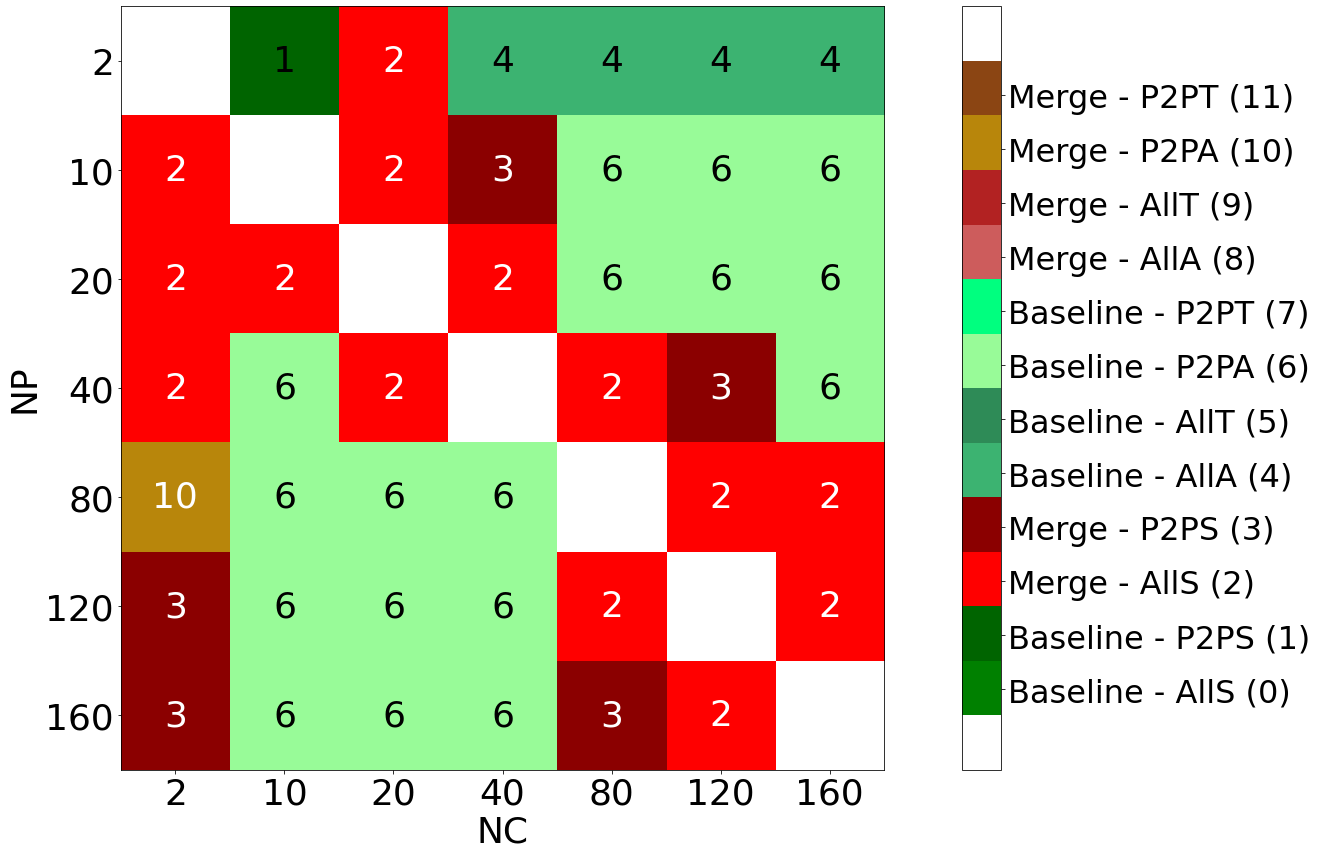

In [217]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(24, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"), 
    colors.to_rgba("green"), 
    colors.to_rgba("darkgreen"),  # En lugar de "darkgreen"
    colors.to_rgba("red"), 
    colors.to_rgba("darkred"),  # En lugar de "darkred"
    colors.to_rgba("mediumseagreen"),  # En lugar de "mediumseagreen"
    colors.to_rgba("seagreen"),  # En lugar de "seagreen"
    colors.to_rgba("palegreen"), 
    colors.to_rgba("springgreen"), 
    colors.to_rgba("indianred"), 
    colors.to_rgba("firebrick"),
    colors.to_rgba("darkgoldenrod"),
    colors.to_rgba("saddlebrown"),
    colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
used_aux=0
results_str = get_heatmap_strings(heatmap)
for i in range(len(processes)):
    for j in range(len(processes)):
        if i!=j:
            aux_color="white"
            if 0 <= heatmap[i, j] <= 1 or 4 <= heatmap[i, j] <= 7: # El 1 puede necesitar texto en negro
                aux_color="black"
            results_index = i*len(processes) +j-used_aux
            if len(results_str[results_index]) == 1:
                text = results_str[results_index][0]
                ax.text(j, i, text, ha="center", va="center", color=aux_color, fontsize=36)
            else:
                add_aux = 0.33
                for line in range(len(results_str[results_index])):
                    i_range = i - 0.5 + add_aux
                    ax.text(j, i_range, results_str[results_index][line],
                            ha="center", va="center", color=aux_color, fontsize=36)
                    add_aux+=0.33
        else:
            used_aux+=1

ax.set_ylabel("NP", fontsize=36)
ax.set_xlabel("NC", fontsize=36)

ax.set_xticklabels(['']+processes, fontsize=36)
ax.set_yticklabels(['']+processes, fontsize=36)


labelsMethods_aux = ['Baseline - AllS (0)', 'Baseline - P2PS (1)',
                    'Merge - AllS (2)','Merge - P2PS (3)',
                    'Baseline - AllA (4)', 'Baseline - AllT (5)','Baseline - P2PA (6)','Baseline - P2PT (7)',
                    'Merge - AllA (8)','Merge - AllT (9)','Merge - P2PA (10)','Merge - P2PT (11)']
colorbar=f.colorbar(im, ax=ax)
tick_bar = []
for i in range(len(used_config)):
    tick_bar.append(0.37 + i*0.92) #TE
colorbar.set_ticks(tick_bar) 
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=32)
#

f.tight_layout()
f.savefig("Images/Heatmap_"+tipo+".png", format="png")

In [172]:
aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_results, aux_counts = np.unique(aux_array, return_counts = True)
print(aux_results)
print(aux_counts)


[ 1  2  3  4  5  6  7  8  9 10 11]
[8 3 3 2 2 1 3 7 4 4 5]


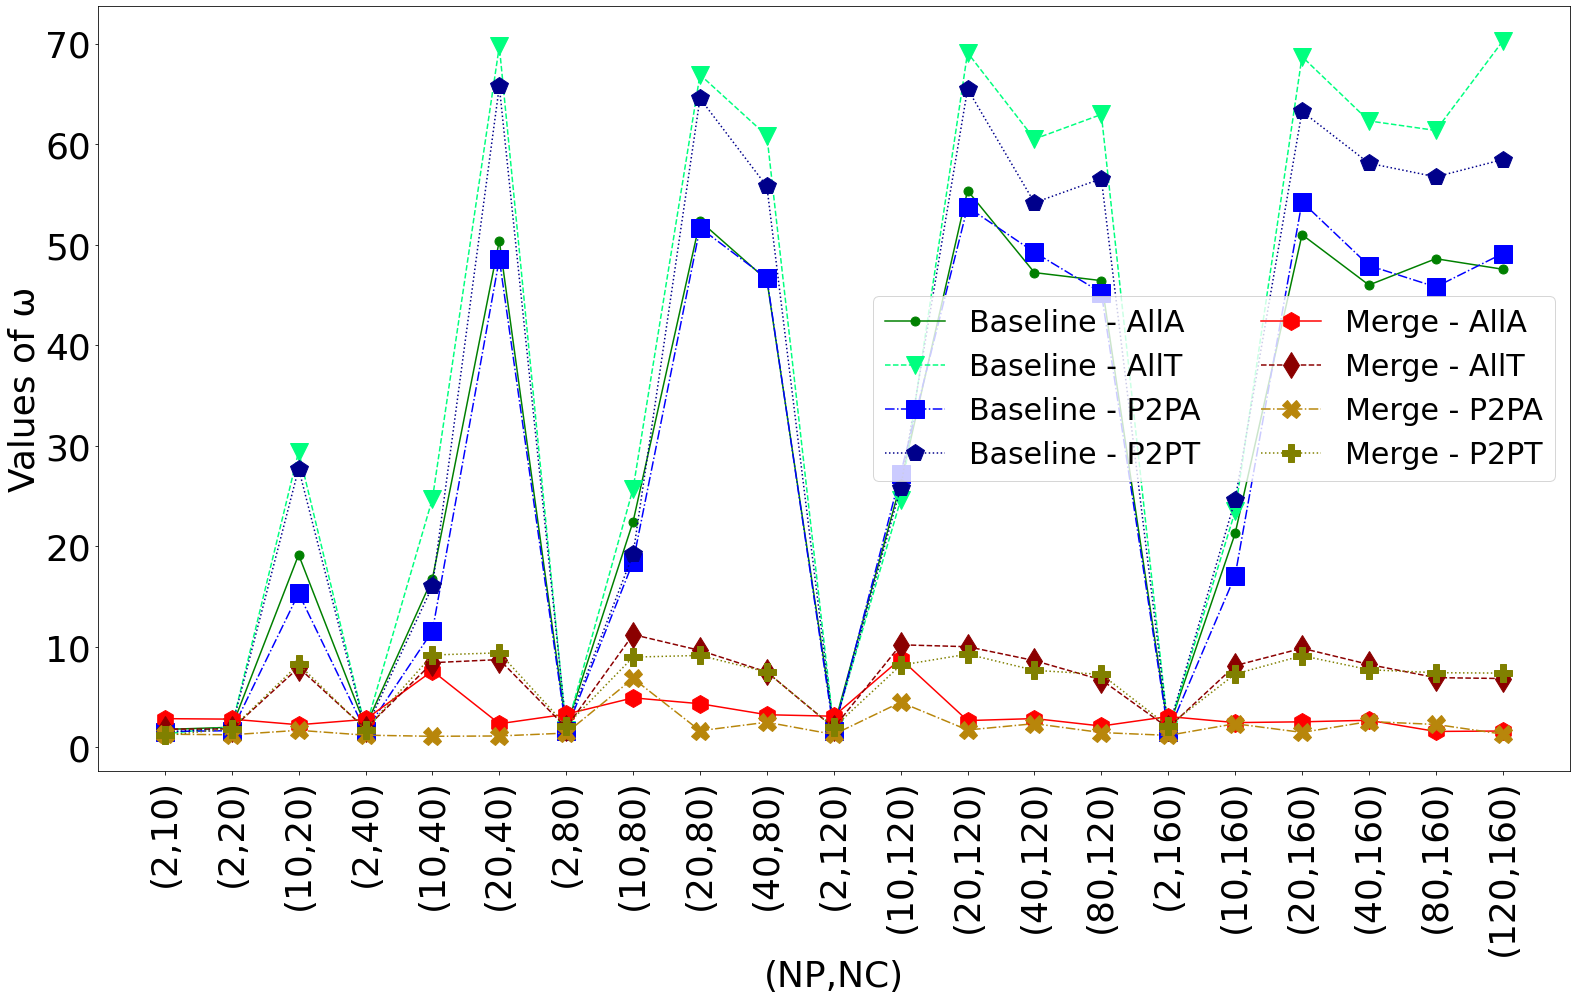

In [22]:
used_direction='e'
test_parameter='omega' #Valores son "alpha" o "omega"

if test_parameter == 'alpha':
    name_fig="Alpha_"
    real_parameter='Alpha'
    name_legend = "Values of α"
    used_config = configurations_simple
    data_aux = grouped_aggM[grouped_aggM[real_parameter] > 0]
elif test_parameter == 'omega':
    name_fig="Omega_"
    real_parameter='Omega'
    name_legend = "Values of ω"
    used_config = configurations
    data_aux = grouped_aggLAsynch[grouped_aggLAsynch[real_parameter] > 0]
if used_direction=='s':
    data_aux=data_aux.query('NP > NC')
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    data_aux=data_aux.query('NP < NC')
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    name_fig= name_fig+"All"    

plot_data = []
for config in used_config:
    if config[0] > 0:
        dataLists = get_config_data(real_parameter, data_aux, config)
        dataLists = list(filter(lambda x: x != float('infinity'), dataLists))
        plot_data.append(dataLists)

labels_aux = []
for ns_aux in processes:
    for np_aux in processes:
        if used_direction=='s' and np_aux > ns_aux or used_direction=='e' and np_aux < ns_aux or used_direction=='a' and np_aux != ns_aux:
            new_label = "(" + str(np_aux) + "," + str(ns_aux) + ")"
            labels_aux.append(new_label)
#print(data_aux[real_parameter])
#print(plot_data)
#print(len(plot_data))
#print(labels_aux)
#print(len(labels_aux))
labelsMethods_aux = ['Baseline - AllA', 'Baseline - AllT','Baseline - P2PA','Baseline - P2PT',
                    'Merge - AllA','Merge - AllT','Merge - P2PA','Merge - P2PT']

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
x = np.arange(len(labels_aux))
for index in range(len(plot_data)):
    array_aux = plot_data[index]
    ax.plot(x, array_aux, color=colors_m[index%len(colors_m)], linestyle=linestyle_m[index%len(linestyle_m)], \
        marker=markers_m[index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])

ax.set_xlabel("(NP,NC)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
plt.xticks(x, labels_aux,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
        
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".png", format="png")

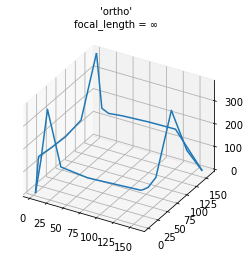

In [114]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

# Get the test data
#X, Y, Z = axes3d.get_test_data(0.05)

aux = grouped_aggG.loc[u_sols[0],'T_total']
Z = [None] * len(processes)
X, Y = np.meshgrid(processes, processes)
removed_index = 0
for i in range(len(processes)):
    Z[i] = [0] * len(processes)
    for j in range(len(processes)):
        if i!=j:
            real_i = i - removed_index
            real_j = j - removed_index
            Z[i][j] = aux.values[real_i*len(processes)+real_j]
        else:
            Z[i][j] = 0
            removed_index += 1  
Z = np.array(Z)

ax.plot_wireframe(X, Y, Z, rstride=20, cstride=10)
ax.set_proj_type('ortho')  # FOV = 0 deg
ax.set_title("'ortho'\nfocal_length = ∞", fontsize=10)
plt.show()

In [ ]:
import dask.dataframe as dd
ddf = dd.from_pandas(dfL[(dfL.Asynch_Iters == False)], npartitions=10)
group = ddf.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch = grouped_aggLSynch.rename(columns={'mean':'T_iter'}) 
grouped_aggLSynch = grouped_aggLSynch.compute()

In [72]:
res1 = [[7, 1, 5, 6, 0, 4, 2, 11, 3, 9, 10, 8], [1, 0, 7, 6, 9, 5, 3, 4, 2, 10, 8, 11], [1, 3, 7, 5, 11, 0, 9, 10, 2, 6, 4, 8], [7, 1, 0, 3, 11, 9, 2, 5, 6, 10, 8, 4], [1, 7, 2, 3, 11, 9, 0, 5, 6, 8, 10, 4], [1, 3, 7, 0, 2, 5, 11, 9, 6, 10, 8], [11, 4, 6, 9, 5, 10, 8, 2, 3, 7, 1], [1, 8, 9, 2, 0, 10, 4, 3, 11, 6, 5, 7], [8, 11, 9, 3, 1, 10, 2, 0, 4, 6, 7, 5], [8, 9, 2, 10, 6, 11, 3, 0, 7, 1, 4], [9, 11, 3, 8, 2, 1, 0, 10, 6, 7, 5, 4], [9, 8, 3, 11, 10, 2, 0, 7, 4, 1, 6, 5], [9, 10, 2, 8, 11, 7, 3, 5, 6, 4, 0, 1], [3, 8, 10, 9, 2, 11, 1, 6, 4, 0], [8, 2, 9, 3, 10, 11, 1], [10, 9, 8, 11, 2, 1, 0, 3], [8, 11, 3, 10, 9, 2, 0, 1], [10, 8, 11, 9, 3, 2, 1, 0], [5, 7, 10, 9, 8, 11, 3, 6, 2, 4, 0, 1], [1, 8, 11, 10, 2, 3, 0, 9, 6], [11, 10, 2, 1, 9, 8, 3], [8, 10, 3, 11], [2, 9, 1, 8, 10, 3], [2, 10, 11], [4, 5, 11, 8, 7, 3, 6, 10, 2, 1, 9, 0], [7, 9, 4, 0, 3, 2], [8, 3, 9, 10, 11, 1, 6, 2, 0], [8, 2, 9, 11, 4, 10, 3, 1], [9, 11, 10, 8, 2, 1], [11, 9, 10, 8, 3], [11, 4, 5, 9, 6, 8, 7, 10, 3, 2, 1, 0], [10, 11, 2, 9, 5, 4, 1, 8, 6, 3, 0, 7], [3, 1, 11, 10, 9, 2, 8], [6, 1, 9, 3, 2, 11, 0], [1, 3, 9, 8, 2, 10, 11], [2, 9, 10, 3, 11, 1, 8], [5, 11, 4, 9, 6, 7, 8, 3, 10, 0, 1, 2], [4, 9, 7, 6, 8, 2, 11, 10, 1, 5, 3, 0], [10, 9, 3, 8, 2, 1, 11, 4], [1, 2, 3], [3, 9, 10, 11, 1, 2, 8], [11, 10, 8, 9, 3, 2]]
res2 = [[7, 1, 5, 6, 0, 4, 2, 11, 3, 9, 10, 8], [1, 0, 7, 6, 9, 5, 3, 4, 2, 10, 8, 11], [1, 3, 7, 5, 11, 0, 9, 10, 2, 6, 4, 8], [7, 1, 0, 3, 11, 9, 2, 5, 6, 10, 8, 4], [1, 7, 2, 3, 11, 9, 0, 5, 6, 8, 10, 4], [1, 3, 7, 0, 2, 5, 11, 9, 6, 10, 8, 4], [11, 4, 6, 9, 5, 10, 8, 2, 3, 7, 1, 0], [1, 8, 9, 2, 0, 10, 4, 3, 11, 6, 5, 7], [8, 11, 9, 3, 1, 10, 2, 0, 4, 6, 7, 5], [8, 9, 2, 10, 6, 11, 3, 0, 7, 1, 4, 5], [9, 11, 3, 8, 2, 1, 0, 10, 6, 7, 5, 4], [9, 8, 3, 11, 10, 2, 0, 7, 4, 1, 6, 5], [9, 10, 2, 8, 11, 7, 3, 5, 6, 4, 0, 1], [3, 8, 10, 9, 2, 11, 1, 6, 4, 0, 7, 5], [8, 2, 9, 3, 10, 11, 1, 0, 4, 6, 7, 5], [10, 9, 8, 11, 2, 1, 0, 3, 6, 4, 7, 5], [8, 11, 3, 10, 9, 2, 0, 1, 4, 6, 7, 5], [10, 8, 11, 9, 3, 2, 1, 0, 6, 4, 5, 7], [5, 7, 10, 9, 8, 11, 3, 6, 2, 4, 0, 1], [1, 8, 11, 10, 2, 3, 0, 9, 6, 5, 4, 7], [11, 10, 2, 1, 9, 8, 3, 4, 0, 6, 7, 5], [8, 10, 3, 11, 6, 1, 9, 2, 0, 4], [2, 9, 1, 8, 10, 3, 11, 0, 6, 4], [2, 10, 11, 9, 1, 8, 3, 0, 6, 4], [4, 5, 11, 8, 7, 3, 6, 10, 2, 1, 9, 0], [7, 9, 4, 0, 3, 2, 11, 8, 1, 6, 5, 10], [8, 3, 9, 10, 11, 1, 6, 2, 0, 4, 7, 5], [8, 2, 9, 11, 4, 10, 3, 1, 6, 7, 0, 5], [9, 11, 10, 8, 2, 1, 3, 6], [11, 9, 10, 8, 3, 2, 1, 0, 6], [11, 4, 5, 9, 6, 8, 7, 10, 3, 2, 1, 0], [10, 11, 2, 9, 5, 4, 1, 8, 6, 3, 0, 7], [3, 1, 11, 10, 9, 2, 8, 4, 7, 6, 0, 5], [6, 1, 9, 3, 2, 11, 0, 10, 7, 4, 8, 5], [1, 3, 9, 8, 2, 10, 11, 6, 7, 0, 4], [2, 9, 10, 3, 11, 1, 8, 6, 0, 4], [5, 11, 4, 9, 6, 7, 8, 3, 10, 0, 1, 2], [4, 9, 7, 6, 8, 2, 11, 10, 1, 5, 3, 0], [10, 9, 3, 8, 2, 1, 11, 4, 7, 6, 5, 0], [1, 2, 3, 7, 6, 10, 8, 11, 9, 0, 4, 5], [3, 9, 10, 11, 1, 2, 8, 6, 4, 0, 7], [11, 10, 8, 9, 3, 2, 1, 6, 0]]

for index in range(len(res1)):
    if res1[index] != res2[index]:
        print(index)
        print(res1[index])
        print(res2[index])

5
[1, 3, 7, 0, 2, 5, 11, 9, 6, 10, 8]
[1, 3, 7, 0, 2, 5, 11, 9, 6, 10, 8, 4]
6
[11, 4, 6, 9, 5, 10, 8, 2, 3, 7, 1]
[11, 4, 6, 9, 5, 10, 8, 2, 3, 7, 1, 0]
9
[8, 9, 2, 10, 6, 11, 3, 0, 7, 1, 4]
[8, 9, 2, 10, 6, 11, 3, 0, 7, 1, 4, 5]
13
[3, 8, 10, 9, 2, 11, 1, 6, 4, 0]
[3, 8, 10, 9, 2, 11, 1, 6, 4, 0, 7, 5]
14
[8, 2, 9, 3, 10, 11, 1]
[8, 2, 9, 3, 10, 11, 1, 0, 4, 6, 7, 5]
15
[10, 9, 8, 11, 2, 1, 0, 3]
[10, 9, 8, 11, 2, 1, 0, 3, 6, 4, 7, 5]
16
[8, 11, 3, 10, 9, 2, 0, 1]
[8, 11, 3, 10, 9, 2, 0, 1, 4, 6, 7, 5]
17
[10, 8, 11, 9, 3, 2, 1, 0]
[10, 8, 11, 9, 3, 2, 1, 0, 6, 4, 5, 7]
19
[1, 8, 11, 10, 2, 3, 0, 9, 6]
[1, 8, 11, 10, 2, 3, 0, 9, 6, 5, 4, 7]
20
[11, 10, 2, 1, 9, 8, 3]
[11, 10, 2, 1, 9, 8, 3, 4, 0, 6, 7, 5]
21
[8, 10, 3, 11]
[8, 10, 3, 11, 6, 1, 9, 2, 0, 4]
22
[2, 9, 1, 8, 10, 3]
[2, 9, 1, 8, 10, 3, 11, 0, 6, 4]
23
[2, 10, 11]
[2, 10, 11, 9, 1, 8, 3, 0, 6, 4]
25
[7, 9, 4, 0, 3, 2]
[7, 9, 4, 0, 3, 2, 11, 8, 1, 6, 5, 10]
26
[8, 3, 9, 10, 11, 1, 6, 2, 0]
[8, 3, 9, 10, 11, 1, 6, 2, 0, 4, 7

In [26]:
[ 1  2  3  4  5  6  7  8  9 10 11]
[ 8  3  3  2  2  1  3  7  4 4  5]

T_iter                                           T_stages
NP                                                              
2    0.601183  [0.5878921505123649, 0.0012718897539322899, 1....
10   0.147450  [0.12425737735303041, 0.0008348409537665612, 5...
20   0.113959  [0.07294734299015768, 0.0011483104476952865, 9...
40   0.142482  [0.03609988304782878, 0.001957720849469921, 0....
80   0.153199  [0.01905616133701956, 0.004801499761109888, 0....
120  0.153628  [0.01350311879663767, 0.005650147536702923, 0....
160  0.156942  [0.010801180394848875, 0.006859205954824823, 0...